# DeepCT：深度模型内部表征的可解释性分析框架

本次分享将介绍一个针对大型语言模型（Large Language Models, LLM）的研究与分析工具 —— **DeepCT (Deep Computed Tomography)**。  
它是一套用于探测 Transformer 模型内部信号与表征演化规律的框架，能够在不修改模型结构的前提下，自动挂载 Hook，实时采集每一层的隐藏状态与注意力激活，从而构建出模型内部的“几何影像”。

DeepCT 的核心目标是：
- **揭示模型内部的结构与语义形成规律**；
- **建立从几何到信息论的统一度量体系**；
- **让大模型的行为解释从黑箱走向可视化、可量化。**

我们希望通过这一框架，使模型的训练、评估与优化不再停留在输入输出层面的“行为测试”，而能够深入模型内部，理解其信息流与语义演化机制。
流与语义演化机制。


## 1. 研究动机：从外部评测到内部理解

在当前大模型研究中，模型性能的评估主要依赖外部指标——例如任务精度、困惑度或基准测试得分。  
这些指标固然重要，但它们仅能反映模型在输入输出层面的表现，而无法揭示模型**内部结构如何支持这些能力的产生**。

我们关心的问题包括：
- 模型在不同层次中如何组织语义信息？
- 各层之间的信息流是否平稳、是否存在冗余？
- 语义空间在传播过程中是否经历“维度塌缩”或“信息压缩”？
- 模型是否存在某些异常层或激活不稳定区域？

这些问题构成了 DeepCT 的出发点：  
> 如何像读取医学影像那样，从模型内部重建其“神经几何结构”？


## 2. 方法论核心：将模型视作“流形演化系统”

DeepCT 的理论基础来自**信息几何（Information Geometry）**与**流形学习（Manifold Learning）**。

我们将 Transformer 模型看作一个高维流形上的动力系统：  
每一层的前向传播都是一次对语义流形的变换（弯曲、收缩或展开），  
而模型的学习过程则是对这种几何结构的逐步重塑。

从这一视角出发，我们可以测量并量化模型的内部几何属性：
- **Intrinsic Dimension (ID)**：表示空间的有效维度，用于衡量层级语义复杂度；
- **Attention Head Entropy (AHE)**：注意力分布的多样性，反映信息流是否过度集中；
- **Layer Correlation (E(l))**：层间表示的相似性与相关性，揭示语义的传递与聚合。

这些指标构成了 DeepCT 的几何诊断体系，使我们能够观察模型内部语义的演化轨迹。


## 3. 系统框架与实现原理

DeepCT 采用非侵入式设计：  
它通过动态挂载 Hook，在模型前向传播时自动捕获中间激活（hidden states, residual streams, attention maps），
并将这些信号送入统一的指标计算与汇总模块。

其基本流程如下：

1. **模型加载**：基于 Transformers 框架加载目标模型；
2. **Hook 注册**：DeepCT 自动识别模型结构，在每一层插入采样点；
3. **前向执行**：在一次推理中捕获多层激活；
4. **指标计算**：实时计算几何、信息与能量相关指标；
5. **结果汇总与可视化**：输出层级曲线、热力图及诊断报告。

通过这种方式，DeepCT 能够对任何 Transformer 模型进行“体内扫描”，而无需重新训练或修改源码。


## 4. 实验演示：模型内部信号的采集与分析

本节以 **Qwen2.5-0.5B-Instruct** 为示例，演示如何利用 DeepCT 在一次前向过程中采集层级表征并计算三类指标：

- **Eigenvalue Spectrum Decay**（每层表示协方差的特征值谱衰减）
- **Intrinsic Dimension vs Layer**（每层的有效维度/内在维度）
- **Token Interaction Flow**（跨 token 的交互与路由强度/集中度）

实验流程：
1. 加载模型与分词器；
2. 初始化 DeepCT，并为目标层自动注册 Hook；
3. 执行一次 forward（触发采集与计算）；
4. 汇总指标并绘制三类曲线/图形用于解读。

三项指标从不同角度刻画“从浅层到深层”的语义演化：  
谱衰减反映低秩压缩趋势；内在维度刻画有效表征复杂度；交互流描述跨 token 信息路由的分散与聚焦。


In [1]:
from deepct import DeepCT, orangepiai_adaptor

tokenizer, model, device = orangepiai_adaptor()

dc = DeepCT(
    model,
    metrics=[
        "selfattn_cov_spectrum",
        "selfattn_repr_correlation",
        "intrinsic_dim",
    ],
)


/home/hzy_projects/DeepCT/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hzy_projects/DeepCT/.venv/lib/python3.9/site-packages/torch_npu/dynamo/__init__.py:18: UserWarning: Register eager implementation for the 'npu' backend of dynamo, as torch_npu was not compiled with torchair.
  warnings.warn(


[Adaptor] 使用本地模型目录: ./model_cache/qwen/Qwen2.5-0.5B-Instruct
[Adaptor] 准备从 ./model_cache/qwen/Qwen2.5-0.5B-Instruct 加载模型 (local_files_only=True)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[Adaptor] 模型迁移到 npu 失败: Unsupported soc version: Ascend310B4
[Adaptor] 自动回退到 CPU 执行（用于分析/画图足够）
[Adaptor] 使用设备: cpu
═══════════════════════════════════════════════════════
🚀  DeepCT — Deep Computed Tomography for LLMs
Version     : 0.1.0
Timestamp   : 2025-11-11 14:03:23
Torch       : 2.1.0
Device      : cpu
Model       : ./model_cache/qwen/Qwen2.5-0.5B-Instruct
Metrics     : selfattn_cov_spectrum, selfattn_repr_correlation, intrinsic_dim
═══════════════════════════════════════════════════════
14:03:23 | INFO     | deepct.deepct - Initializing DeepCT at 2025-11-11 14:03:23
14:03:23 | INFO     | deepct.deepct - Loaded model: ./model_cache/qwen/Qwen2.5-0.5B-Instruct
14:03:23 | INFO     | deepct.deepct - Registered metrics: selfattn_cov_spectrum, selfattn_repr_correlation, intrinsic_dim
14:03:24 | INFO     | deepct.deepct - Hook registration completed, total 336 hooks


In [2]:
messages = [
    {
        "role": "system",
        "content": "你是一个帮助理解大模型内部表征与语义演化规律的助手。"
    },
    {
        "role": "user",
        "content": (
            "夜色低垂，城市的灯光在远处一点一点亮起，"
            "每一盏灯都像是记忆的碎片，被风轻轻摇曳。"
            "我走在长长的街道上，思绪却飘回了那些尚未散尽的旧时光。"
            "曾经的我们，总以为世界辽阔得没有边界，"
            "可以肆意奔跑、可以不必告别；"
            "然而当岁月的河流悄然流过，许多曾经以为不会改变的东西，"
            "都被时间打磨成了温柔的模样。"

            "在人生的不同阶段，我们像层层叠叠的神经网络，"
            "从细碎的感官信号中提取意义，又在反复的迭代中学会取舍。"
            "浅层的我们，追逐喧嚣与热闹；"
            "深层的我们，开始渴望沉静与理解。"
            "就像模型的多层注意力机制，"
            "在不断地重构自我表征的过程中，"
            "那些最初的噪声与无序，终被抽象为结构、情感与意义。"

            "也许成长的过程，正是一次长久的反向传播——"
            "我们在错误中更新权重，在失去中校正方向。"
            "有些记忆像权重衰减后仍残留的梯度，微弱却真实，"
            "提醒着我们：被遗忘的并非无用，只是被新的理解覆盖。"
            "当我们终于学会用更高维的目光去看待生活，"
            "才明白所有的喧嚣与安静、得与失，"
            "都不过是语义空间里的不同投影，"
            "而心的深处，才是那稳定而恒久的向量表示。"
        )
    }
]

text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = tokenizer(text, return_tensors="pt").to(device)

_ = dc(**inputs)
metrics_result = dc.collect()


14:03:32 | INFO     | deepct.deepct - Auto-generated labels from input_ids
14:11:51 | SUCCESS  | deepct.collector - Collecting 3 metrics : success=3, failed=0
14:11:51 | INFO     | deepct.deepct - Generating DeepCT summary ...
DeepCT Metric Summary (using PyTorch)
Metrics count: 3
Total components: 384 (across all metrics)

[Metric]: selfattn_cov_spectrum
  Data Type Distribution:
     vector: 24 components

  Basic Statistics:
    Scalar: no valid data
    Vector: norm=[0.024442,46.117794], mean=[0.000121,0.160757], avg_norm=5.452795
      Shapes (24 total): [(319,), (324,), (331,), '...', (760,), (767,), (781,)]
    Tensor: no valid data

  Key Component Type Stats:
               self_attn: mean=5.452795 (n=24)

  Layer-wise Trend:
    Layer  0: value=0.024442
    Layer  1: value=0.428017
    Layer  2: value=1.186323
    ...
    Layer 21: value=36.229691
    Layer 22: value=4.593040
    Layer 23: value=46.117794
    Overall trend: increasing (first=0.024442, last=46.117794)

  Outli

## 指标一：Eigenvalue Spectrum Decay（协方差谱衰减）

**问题与直觉**  
给定某层的隐藏表示矩阵 $H \in \mathbb{R}^{T \times d}$（序列长度 $T$、隐藏维度 $d$），
我们关心该层是否呈现“低秩化”：能量是否集中在少数主成分上。谱越陡，低秩越明显，意味着该层更强的冗余压缩。

**定义与度量**  
去均值后定义样本协方差：
$$
\Sigma=\frac{1}{T-1}(H-\bar H)^\top(H-\bar H), \quad
\lambda_1\ge\lambda_2\ge\cdots\ge\lambda_d\ge 0.
$$
常用量化方式：
- **谱衰减斜率**：在 $(\log i,\ \log \lambda_i)$ 或 $(i,\ \log \lambda_i)$ 拟合直线斜率，记为 $\alpha_l$。$|\alpha_l|$ 越大表示谱越陡、低秩越强。  
- **Tail-mass / 主成分占比**：累计占比 $r_k=\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^d\lambda_i}$ 达到固定阈值（如 90%）所需的 $k$ 越小，低秩越强。  
- **有效秩近似**（可选）：$\mathrm{erank}=\frac{(\sum_i\lambda_i)^2}{\sum_i\lambda_i^2}$。

**实践要点**  
多样本文本、分批统计可降低方差；长序列可子采样 token；对拟合区变化”：所需主成分数越少 → 该层越低秩。


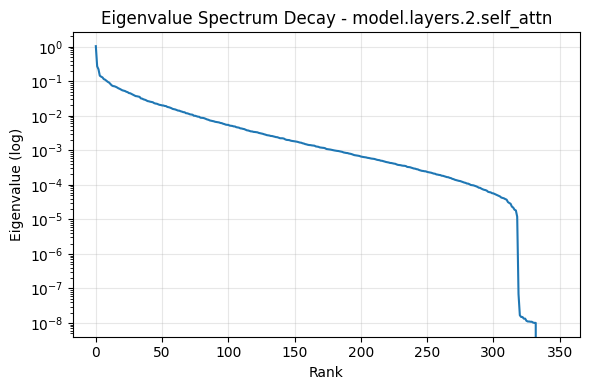

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

spec = metrics_result.get("selfattn_cov_spectrum")

if spec is None:
    print("未找到 'selfattn_cov_spectrum'，metrics_result keys:", metrics_result.keys())
else:
    layer_names = sorted(spec.keys())
    if not layer_names:
        print("'selfattn_cov_spectrum' 结果为空")
    else:
        # 选一层做示意：这里取中间层
        mid_layer = layer_names[len(layer_names) // 2]
        eigs = spec[mid_layer]

        if isinstance(eigs, torch.Tensor):
            eigs = eigs.detach().cpu().numpy()

        eigs = np.asarray(eigs).reshape(-1)
        eigs = np.sort(eigs)[::-1]   # 按从大到小排序

        plt.figure(figsize=(6,4))
        plt.plot(eigs)
        plt.yscale("log")
        plt.xlabel("Rank")
        plt.ylabel("Eigenvalue (log)")
        plt.title(f"Eigenvalue Spectrum Decay - {mid_layer}")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


**图 1 解释：Eigenvalue Spectrum Decay （中间层 Self-Attention 输出）**

该图展示模型中间层的隐藏表征协方差特征值谱（纵轴为对数特征值，横轴为秩 Rank）。  
可以观察到：

- 能量主要集中在前 10–20 个主成分，说明该层的方差贡献高度集中；  
- 曲线在低 Rank 区域迅速下降，随后逐渐平缓，表明该层出现明显的低秩压缩趋势；  
- 尾部特征值衰减至 1e-7 ～ 1e-8 量级，表征在多数方向上已被强烈抑制。

整体上说明该层表征空间已由高维展开转向低维收缩，模型开始聚焦于少数主方向，为后续语义抽象奠定低秩基础。


## 指标二：Intrinsic Dimension vs Layer（内在维度随层变化）

**问题与直觉**  
内在维度（ID）刻画某层表征使用了多少“独立方向”。ID 高 → 信息仍较分散；ID 低 → 语义已被压缩到更少的主方向。

**谱法估计（与指标一配套）**  
令 $\{\lambda_i\}_{i=1}^d$ 为该层协方差的特征值，采用参与度型有效维度：
$$
\mathrm{ID}_l=\frac{\left(\sum_{i=1}^d\lambda_i\right)^2}{\sum_{i=1}^d\lambda_i^2}.
$$
能量越平均（高秩）则 $\mathrm{ID}_l$ 越大；能量越集中（低秩）则 $\mathrm{ID}_l$ 越小。  
也可选用基于 kNN 的流形维度估计，但谱法与本框架采集流程最匹配、最稳定。

**实践要点**  
保证样本多样性与长度控制；必要时对隐藏向量做标准化/白化以稳定协方差估计；- 后层低而稳：决策空间更低维、更确定。


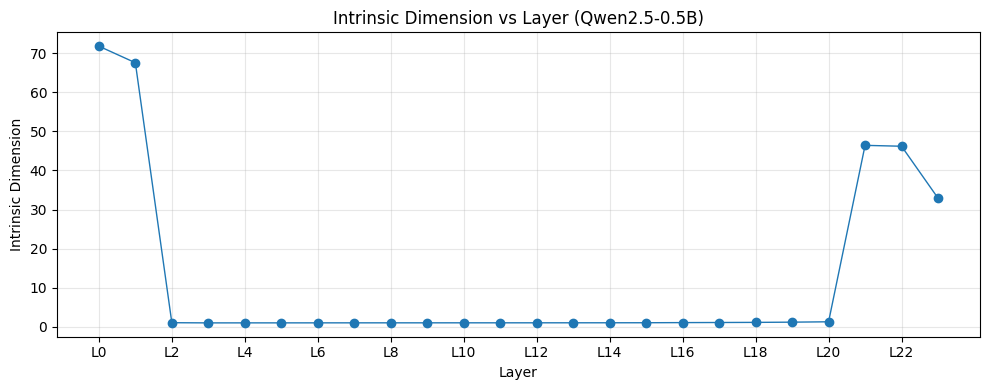

In [4]:
import re
id_result = metrics_result["intrinsic_dim"]  # 新名字

pairs = []
for k, v in id_result.items():
    m = re.search(r"model\.layers\.(\d+)$", k)
    if m:
        pairs.append((int(m.group(1)), float(v)))

pairs.sort()
layers = [f"L{idx}" for idx, _ in pairs]
vals = [val for _, val in pairs]

plt.figure(figsize=(10, 4))
plt.plot(range(len(vals)), vals, marker="o", linewidth=1)
# 只显示 ~12 个刻度，避免拥挤
step = max(1, len(layers) // 12)
plt.xticks(range(0, len(layers), step), [layers[i] for i in range(0, len(layers), step)])
plt.xlabel("Layer")
plt.ylabel("Intrinsic Dimension")
plt.title("Intrinsic Dimension vs Layer (Qwen2.5-0.5B)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**图 2 解释：Intrinsic Dimension vs Layer （基于 Participation Ratio）**

该曲线描绘模型各层的内在维度 ID，定义为：  
ID = (sum s_i²)² / (sum s_i⁴)，其中 s_i 为隐藏表示矩阵的奇异值。  
从图中可见：

- **早层（L0–L2）**：ID 值较高（约 70），模型在“展开”输入，语义仍较分散；  
- **中层（L3–L18）**：ID 显著下降并长期维持在极低水平（≈ 1），说明表征被压缩到极少数主方向；  
- **后层（L20 以后）**：ID 重新上升（约 40–50），模型在输出阶段再次扩展表征空间。

该“增 → 减 → 再增”的 U 型趋势表明：模型先扩展特征，再在中层聚合压缩形成语义核心，最后为生成任务重新展开。


## 指标三：Token Interaction Flow（跨 token 交互流）

**问题与直觉**  
自注意力在 token 之间路由信息。我们度量“交互是分散还是聚焦”，从而判断该层是否形成了稳定的语义骨架或枢纽 token。

**从注意力矩阵构造度量**  
设第 $l$ 层第 $h$ 个头注意力为 $A^{(l,h)}\in\mathbb{R}^{T\times T}$（行归一化），
定义层平均注意力 $\bar A^{(l)}=\frac{1}{H}\sum_{h=1}^H A^{(l,h)}$。据此可定义：
- **Flow Entropy（流熵）**  
  $$
  \mathrm{H}^{(l)}=-\frac{1}{T}\sum_{i=1}^T\sum_{j=1}^T \bar A^{(l)}_{ij}\,\log\big(\bar A^{(l)}_{ij}+\epsilon\big).
  $$
  越高 → 交互更分散；越低 → 路由更聚焦。  
- **Locality / Concentration（局部性/集中度）**  
  统计主对角带或 Top-k 列的质量占比，衡量依赖是否集中在邻近或关键位置。  
- **In/Out-Flow Skew（入/出流不均衡）**  
  定义 $\mathrm{in}_j=\sum_i \bar A^{(l)}_{ij}$、$\mathrm{out}_i=\sum_j \bar A^{(l)}_{ij}$，用方差或基尼系数衡量“枢纽 token”强度。

实际展示中可选择其中一项或多项联合作为“交互流”指标。

**实践要点**  
平均多头可提升稳健性，但可辅以分位数/极值展示头间差异；比较不同长度序列时需做长度归一化或对数修正；注意 causa或“入流方差”：数值上升 → 出现枢纽/信息汇聚。


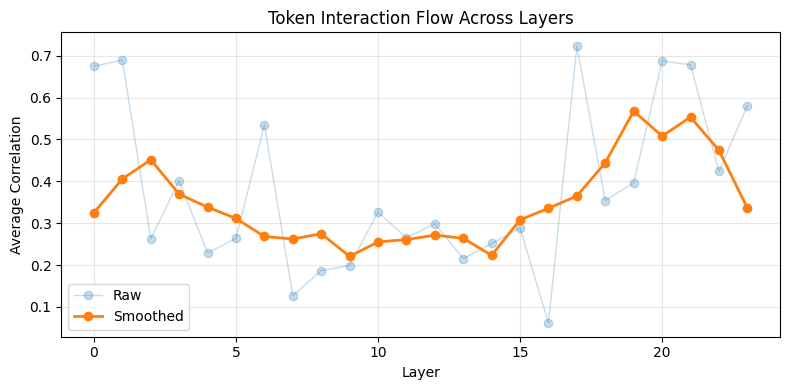

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt

corr = metrics_result.get("selfattn_repr_correlation")

if corr is None:
    print("未找到 'selfattn_repr_correlation'，metrics_result keys:", metrics_result.keys())
else:
    pairs = []
    for name, val in corr.items():
        m = re.search(r"layers\.(\d+)", name)
        if m:
            pairs.append((int(m.group(1)), float(val)))

    if not pairs:
        print("'selfattn_repr_correlation' 没匹配到层号，示例 keys:", list(corr.keys())[:10])
    else:
        # 按层号排序
        pairs.sort()
        layers = [p[0] for p in pairs]
        vals = [p[1] for p in pairs]

        # ---- 平滑处理：简单移动平均，避免抖成锯齿 ----
        window = 5   # 想更平滑可以试 5
        kernel = np.ones(window) / window
        smooth_vals = np.convolve(vals, kernel, mode="same")

        plt.figure(figsize=(8, 4))

        # 原始曲线（淡一点当参考）
        plt.plot(layers, vals, marker="o", linewidth=1, alpha=0.25, label="Raw")

        # 平滑后的曲线（主视图，更接近你画的红线趋势）
        plt.plot(layers, smooth_vals, marker="o", linewidth=2, label="Smoothed")

        plt.xlabel("Layer")
        plt.ylabel("Average Correlation")
        plt.title("Token Interaction Flow Across Layers")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()


**图 3 解释：Token Interaction Flow Across Layers**

图中橙色曲线表示平滑后的平均相关性（衡量 token 间信息交互强度）。  
可以看到：

- 早层相关性较高，模型在广泛收集上下文信息（交互分散）；  
- 中层相关性明显下降，注意力聚焦于少数关键 token （交互集中，出现“枢纽”）；  
- 后层相关性再次上升，生成阶段信息重新扩散以建立长程依赖。

这种“增 → 减 → 再增”的变化规律与内在维度曲线一致，说明语义信息在模型内部经历了由分散到聚合再到再分散的动态演化过程。
